#Melakukan import beberapa package yang akan digunakan selama membuat model ML

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt

# Untuk pemodelan
import tensorflow as tf
import keras
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Activation
from keras.models import Model

# Untuk mengupload file
import os

# Untuk export dataframe ke csv melalui colab
from google.colab import files

# Untuk splitting data
from sklearn.model_selection import train_test_split

# Untuk encoding data
from sklearn.preprocessing import LabelEncoder

# Untuk print data yang lebih complex pada hasil prediksi
from pprint import pprint

#Mounting folder gdrive dengan google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Melakukan import data dari google drive ke google colab

In [ ]:
package_tourism = pd.read_csv('/content/drive/MyDrive/Bangkit/package_tourism.csv')
tourism_rating = pd.read_csv('/content/drive/MyDrive/Bangkit/tourism_rating.csv')
tourism_with_id = pd.read_csv('/content/drive/MyDrive/Bangkit/tourism_with_id.csv')
user = pd.read_csv('/content/drive/MyDrive/Bangkit/user.csv')

#Menampilkan 5 data awal pada setiap file yang diinput ke google colab

In [ ]:
# 5 data awal package_tourism
package_tourism.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [ ]:
# 5 data awal tourism_rating
tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
# 5 data awal tourism_with_id
tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
# 5 data awal user
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


#Preprocessing data sebelum melakukan pemodelan

In [ ]:
# Menghapus kolom yang tidak dipakai dalam tourism_with_id
tourism_with_id =  tourism_with_id.loc[:, ~tourism_with_id.columns.str.contains('^Unnamed')]
tourism_with_id = tourism_with_id.drop(['Coordinate','Lat','Long','City','Description'],axis = 1)
tourism_with_id.head()

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes
0,1,Monumen Nasional,Budaya,20000,4.6,15.0
1,2,Kota Tua,Budaya,0,4.6,90.0
2,3,Dunia Fantasi,Taman Hiburan,270000,4.6,360.0
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5,NaN
4,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,60.0


In [ ]:
# Mengganti data NaN dengan rata-rata
tourism_with_id = tourism_with_id.fillna(tourism_with_id.mean())
tourism_with_id.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes
0,1,Monumen Nasional,Budaya,20000,4.6,15.000000
1,2,Kota Tua,Budaya,0,4.6,90.000000
2,3,Dunia Fantasi,Taman Hiburan,270000,4.6,360.000000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5,82.609756
4,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,60.000000


In [ ]:
# Merge tourism_rating dan tourism_with_id
merge_tourism = tourism_rating.merge(tourism_with_id,how = 'left',on = 'Place_Id')
merge_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Price,Rating,Time_Minutes
0,1,179,3,Candi Ratu Boko,Budaya,75000,4.6,90.000000
1,1,344,2,Pantai Marina,Bahari,3000,4.1,82.609756
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,60.000000
3,1,373,3,Museum Kereta Ambarawa,Budaya,10000,4.5,60.000000
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,0,4.0,82.609756


In [ ]:
# Copy merge_tourism ke dataframe baru
df = merge_tourism.copy()
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Price,Rating,Time_Minutes
0,1,179,3,Candi Ratu Boko,Budaya,75000,4.6,90.000000
1,1,344,2,Pantai Marina,Bahari,3000,4.1,82.609756
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,60.000000
3,1,373,3,Museum Kereta Ambarawa,Budaya,10000,4.5,60.000000
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,0,4.0,82.609756


In [ ]:
# Encoding pengguna dan menghitung jumlah pengguna yang ada di dataset
encoder_pengguna = LabelEncoder()
df['pengguna'] = encoder_pengguna.fit_transform(df['User_Id'].values)
jml_pengguna = df['pengguna'].nunique()

In [ ]:
# Encoding tempat dan menghitung jumlah tempat yang ada di dataset
encoder_item = LabelEncoder()
df['tempat'] = encoder_item.fit_transform(df['Place_Name'].values)
jml_tempat = df['tempat'].nunique()

In [ ]:
# Mengubah rating menjadi float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimun serta maksimum
min_rating , max_rating = min(df['Place_Ratings']) , max(df['Place_Ratings'])

# Mengacak dataset
df = df.sample(frac=1, random_state=42)

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

print(f'Jumlah Pengguna: {jml_pengguna}, Jumlah Tempat: {jml_tempat}, Min Rating: {min_rating}, Max Rating: {max_rating}')
df.head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jumlah Pengguna: 300, Jumlah Tempat: 437, Min Rating: 1.0, Max Rating: 5.0


,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Price,Rating,Time_Minutes,pengguna,tempat
6252,188,207,3.0,Heha Sky View,Taman Hiburan,15000,4.4,120.000000,187,107
4684,142,268,2.0,Sudut Pandang Bandung,Taman Hiburan,50000,4.6,150.000000,141,342
1731,54,103,3.0,Tugu Pal Putih Jogja,Taman Hiburan,0,4.7,15.000000,53,411
4742,144,119,3.0,Lava Bantal,Budaya,5000,4.4,30.000000,143,169
4521,138,288,5.0,Masjid Salman ITB,Tempat Ibadah,0,4.8,82.609756,137,187
6340,191,403,2.0,Taman Barunawati,Taman Hiburan,0,4.2,30.000000,190,354
576,19,9,3.0,Pelabuhan Marina,Bahari,175000,4.4,82.609756,18,297
5202,158,372,2.0,Gua Maria Kerep Ambarawa,Cagar Alam,2000,4.8,82.609756,157,99
6363,191,412,3.0,Masjid Nasional Al-Akbar,Tempat Ibadah,0,4.9,82.609756,190,184
439,15,9,4.0,Pelabuhan Marina,Bahari,175000,4.4,82.609756,14,297


#Membagi data training dan data testing serta melakukan normalizing data rating

In [ ]:
# Membagi data training dan data testing
x = df[['pengguna','tempat']].values
y = df['Place_Ratings'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [ ]:
# Membuat array data training dan data testing
x_train_array = [x_train[:, 0], x_train[:, 1]]
x_test_array = [x_test[:, 0], x_test[:, 1]]

In [ ]:
x_train, x_train_array, x_train_array[0].shape

(array([[173,  15],
        [ 76, 348],
        [182, 355],
        ...,
        [ 15, 261],
        [222,  13],
        [185, 431]]),
 [array([173,  76, 182, ...,  15, 222, 185]),
  array([ 15, 348, 355, ..., 261,  13, 431])],
 (8000,))

In [ ]:
# Normalize data rating pada data training dan data testing
y_train = (y_train - min_rating)/(max_rating - min_rating)
y_test = (y_test - min_rating)/(max_rating - min_rating)

#Membuat model machine learning serta menampilkan plot rmse dan loss training dengan validation

In [ ]:
# Membuat model machine learning
input_tempat = Input(shape=[1], name="input-tempat")
pengkodean_tempat = Embedding(jml_tempat+1, 150, name="pengkodean-tempat",embeddings_initializer = 'he_normal',embeddings_regularizer = keras.regularizers.l2(1e-6))(input_tempat)
tempat_vec = Flatten(name="Flatten-tempat")(pengkodean_tempat)

input_pengguna = Input(shape=[1], name="input-pengguna")
pengkodean_pengguna = Embedding(jml_tempat+1, 150, name="pengkodean-pengguna",embeddings_initializer = 'he_normal',embeddings_regularizer = keras.regularizers.l2(1e-6))(input_pengguna)
pengguna_vec = Flatten(name="Flatten-pengguna")(pengkodean_pengguna)

#prod = Dot(name="Dot-Product", axes=1)([tempat_vec, pengguna_vec])
conc = Concatenate()([tempat_vec, pengguna_vec])
fc1 = Dense(256, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(conc)
fc2 = Dense(128, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(fc1)
fc3 = Dense(32, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(fc2)
out = Dense(1)(fc3)
model = Model([input_pengguna, input_tempat], out)
model.compile('adam', 'mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Mensave model machine learning
model.save('/content/drive/MyDrive/Bangkit/capstone_project.h5')
model.save('/content/drive/MyDrive/Bangkit/capstone_project')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit/capstone_project/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit/capstone_project/assets


In [ ]:
# Convert model ke dalam bentuk tf.lite
modelku = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit/capstone_project')
converter = tf.lite.TFLiteConverter.from_keras_model(modelku)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("/content/drive/MyDrive/Bangkit/converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpi40msbr5/assets


INFO:tensorflow:Assets written to: /tmp/tmpi40msbr5/assets


983956

In [ ]:
# Menampilkan summary model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input-tempat (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 input-pengguna (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 pengkodean-tempat (Embedding)  (None, 1, 150)       65700       ['input-tempat[0][0]']           
                                                                                                  
 pengkodean-pengguna (Embedding  (None, 1, 150)      65700       ['input-pengguna[0][0]']         
 )                                                                                            

In [ ]:
# Melihat root_mean_squared_error dan val_root_mean_squared_error pada masing-masing epoch
history = model.fit(x = x_train_array, y= y_train, batch_size = 20, epochs = 50, verbose = 1, validation_data = (x_test_array, y_test), shuffle = True)

Epoch 1/50
400/400 [==============================] - 4s 9ms/step - loss: 0.2404 - root_mean_squared_error: 0.3454 - val_loss: 0.2391 - val_root_mean_squared_error: 0.3439
Epoch 2/50
400/400 [==============================] - 4s 9ms/step - loss: 0.2405 - root_mean_squared_error: 0.3455 - val_loss: 0.2394 - val_root_mean_squared_error: 0.3442
Epoch 3/50
400/400 [==============================] - 4s 10ms/step - loss: 0.2405 - root_mean_squared_error: 0.3455 - val_loss: 0.2395 - val_root_mean_squared_error: 0.3442
Epoch 4/50
400/400 [==============================] - 2s 5ms/step - loss: 0.2404 - root_mean_squared_error: 0.3455 - val_loss: 0.2390 - val_root_mean_squared_error: 0.3439
Epoch 5/50
400/400 [==============================] - 2s 5ms/step - loss: 0.2404 - root_mean_squared_error: 0.3454 - val_loss: 0.2392 - val_root_mean_squared_error: 0.3440
Epoch 6/50
400/400 [==============================] - 2s 5ms/step - loss: 0.2403 - root_mean_squared_error: 0.3454 - val_loss: 0.2393 - val

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

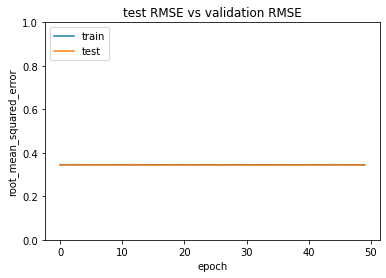

<Figure size 432x288 with 0 Axes>

In [ ]:
# Menampilkan plot test root mean square dan validation root mean square

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('test RMSE vs validation RMSE')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("/content/drive/MyDrive/Bangkit/matplotlib1.png")

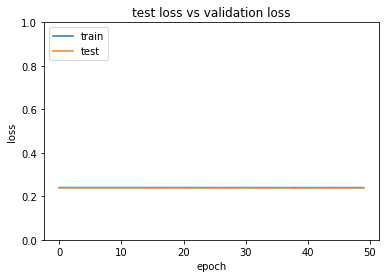

<Figure size 432x288 with 0 Axes>

In [ ]:
# Menampilkan plot test loss dan validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('test loss vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("/content/drive/MyDrive/Bangkit/matplotlib2.png")

#Melakukan prediksi dengan menggunakan model yang telah terbentuk

In [ ]:
# Mengambil sampel user dan data tempat yang sudah dikunjungi oleh user tersebut
sampel_pengguna = df.pengguna.sample(1).iloc[0]
id_pengguna = [sampel_pengguna]
id_pengkodean_pengguna = encoder_pengguna.transform(id_pengguna)

tempat_sudah_dikunjungi = list(df[df['pengguna'] == id_pengguna[0]]['tempat'])

In [ ]:
# Mengambil data tempat yang belum dikunjungi oleh user tersebut
tempat_belum_dikunjungi = [i for i in range(min(df['tempat']), max(df['tempat'])+1) if i not in tempat_sudah_dikunjungi]

In [ ]:
model_input = [np.asarray(list(id_pengkodean_pengguna)*len(tempat_belum_dikunjungi)), np.asarray(tempat_belum_dikunjungi)]
len(model_input), len(model_input[0])

(2, 413)

In [ ]:
# Mencari rating prediksi pada model tersebut
predicted_ratings = model.predict(model_input)

In [ ]:
# Mencari nilai rating pada model prediksi tersebut
predicted_ratings = np.max(predicted_ratings, axis=1)

In [ ]:
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)

[412 140 130 131 132 133 134 135 136 137 138 139 141 128 142 143 144 145
 146 147 148 149 150 151 129 127 153 114 104 105 106 107 108 109 110 111
 112 113 115 126 116 117 118 119 120 121 122 123 124 125 152 154 205 192
 182 183 184 185 186 187 188 189 190 191 193 180 194 195 196 197 198 199
 200 201 202 203 181 179 155 166 156 157 158 159 160 161 162 163 164 165
 167 178 168 169 170 171 172 173 174 175 176 177 103 102 101  37  27  28
  29  30  31  32  33  34  35  36  38  25  39  40  41  42  43  44  45  46
  47  48  26  24 100  11   1   2   3   4   5   6   7   8   9  10  12  23
  13  14  15  16  17  18  19  20  21  22  49  50  51  88  78  79  80  81
  82  83  84  85  86  87  89  52  90  91  92  93  94  95  96  97  98  99
  77  76  75  74  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73 204 206 411 347 337 338 339 340 341 342 343
 344 345 346 348 335 349 350 351 352 353 354 355 356 357 358 336 334 360
 321 311 312 313 314 315 316 317 318 319 320 322 33

In [ ]:
recommended_place = encoder_item.inverse_transform(sorted_index)
print(recommended_place)

['Tugu Proklamasi' 'Kampung Wisata Kadipaten' 'Kampoeng Kopi Banaran'
 'Kampoeng Rawa' 'Kampoeng Tulip' 'Kampung Batik Gedong Semarang'
 'Kampung Batu Malakasari' 'Kampung Cina' 'Kampung Korea Bandung'
 'Kampung Pelangi' 'Kampung Tematik Jawi' 'Kampung Wisata Dipowinatan'
 'Kampung Wisata Rejowinangun' 'Jurang Tembelan Kanigoro'
 'Kampung Wisata Sosro Menduran' 'Kampung Wisata Taman Sari'
 'Kauman Pakualaman Yogyakarta' 'Kawah Putih' 'Kawah Rengganis Cibuni'
 'Kawasan Kuliner BSM' 'Kawasan Malioboro' 'Kawasan Punclut'
 'Kawasan Wisata Sosrowijayan' 'Kebun Bibit Wonorejo'
 'Kampoeng Djadhoel Semarang' 'Jogja Exotarium' 'Kebun Binatang Ragunan'
 'Hutan Pinus Pengger' 'Gunung Papandayan' 'GunungTangkuban perahu'
 'Happyfarm Ciwidey' 'Heha Sky View' 'House of Sampoerna'
 'Hutan Bambu Keputih' 'Hutan Kota Srengseng' 'Hutan Mangrove Kulon Progo'
 'Hutan Pinus Asri' 'Hutan Pinus Kayon' 'Hutan Wisata Tinjomoyo Semarang'
 'Jogja Bay Pirates Adventure Waterpark' 'Indonesia Kaya Park'
 'Istana Ne

In [ ]:
# Menampilkan tempat yang sudah dikunjungi user dan menampilkan tempat rekomendasi bagi user tersebut
print("")
print("Tempat yang sudah dikunjungi : ")
pprint(list(df[df['pengguna'] == id_pengguna[0]]['Place_Name']))
print("")
print("---------------------------------------------------------")
print("Top " +str(5)+" Tempat rekomendasi untuk pengguna "+str(id_pengguna)+" adalah: ")
pprint(list(recommended_place[:5]))


Tempat yang sudah dikunjungi : 
['Pantai Maron',
 'Taman Sejarah Bandung',
 'Freedom Library',
 'Tugu Pal Putih Jogja',
 'Waterpark Kenjeran Surabaya',
 'Pantai Baruna',
 'Watu Mabur Mangunan',
 'Museum Geologi Bandung',
 'Freedom Library',
 'Freedom Library',
 'Embung Tambakboyo',
 'Happyfarm Ciwidey',
 'Pantai Watu Kodok',
 'Museum Barli',
 'The Lodge Maribaya',
 'Kebun Tanaman Obat Sari Alam',
 'Indonesia Kaya Park',
 'Masjid Agung Trans Studio Bandung',
 'Taman Kunang-Kunang',
 'Keraton Surabaya',
 'Taman Air Mancur Menari Kenjeran',
 'Goa Jomblang',
 'Museum Sasmita Loka Ahmad Yani',
 'Ocean Ecopark',
 'Candi Sewu',
 'Bangsal Pagelaran']

---------------------------------------------------------
Top 5 Tempat rekomendasi untuk pengguna [299] adalah: 
['Tugu Proklamasi',
 'Kampung Wisata Kadipaten',
 'Kampoeng Kopi Banaran',
 'Kampoeng Rawa',
 'Kampoeng Tulip']


#Convert model menjadi bentuk tf.lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('capstone_project.tflite')
tflite_model_file.write_bytes(tflite_model)